In [59]:
# The magic four
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Dates
import datetime


from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

import statsmodels.api as sm
##
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
##
from statsmodels.tsa.seasonal import seasonal_decompose

# Plots size and style
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (15,10)

In [2]:
sea_level = pd.read_csv('sea_levels.csv')

In [3]:
sea_level #GMSL means Global Mean Sea Level

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2
...,...,...,...
1603,2013-08-15,71.6,8.8
1604,2013-09-15,68.8,8.8
1605,2013-10-15,66.4,8.9
1606,2013-11-15,59.7,9.0


In [4]:
sea_level.shape

(1608, 3)

In [5]:
sea_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              1608 non-null   object 
 1   GMSL              1608 non-null   float64
 2   GMSL uncertainty  1608 non-null   float64
dtypes: float64(2), object(1)
memory usage: 37.8+ KB


In [6]:
sea_level.isnull().sum()

Time                0
GMSL                0
GMSL uncertainty    0
dtype: int64

In [7]:
# convert date to datetime:

sea_level['Time'] = pd.to_datetime(sea_level['Time'], format = '%Y-%m-%d')


In [8]:
sea_level.set_index('Time', inplace = True)
sea_level.sort_index(inplace = True)

In [9]:
sea_level = sea_level.resample('M').mean()

In [10]:
sea_level.index

DatetimeIndex(['1880-01-31', '1880-02-29', '1880-03-31', '1880-04-30',
               '1880-05-31', '1880-06-30', '1880-07-31', '1880-08-31',
               '1880-09-30', '1880-10-31',
               ...
               '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30',
               '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31',
               '2013-11-30', '2013-12-31'],
              dtype='datetime64[ns]', name='Time', length=1608, freq='M')

Text(0.5, 1.0, 'Global Mean Sea Level')

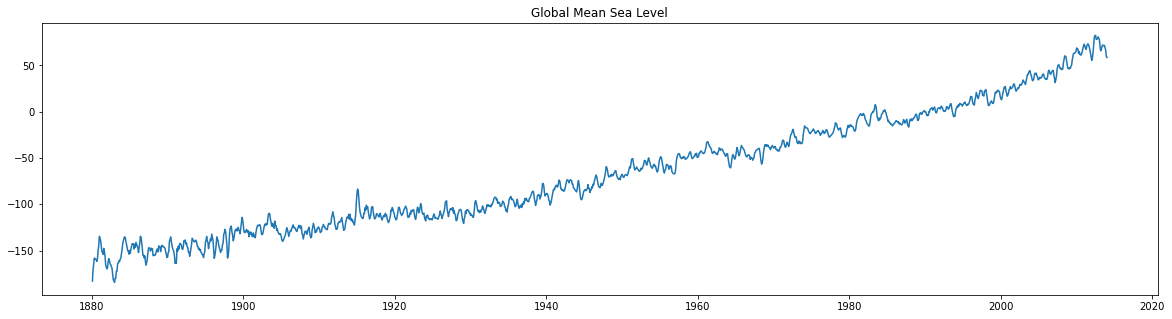

In [11]:
# plot sea level:

plt.figure(figsize=(20,5))
plt.plot(sea_level['GMSL'])
plt.title('Global Mean Sea Level')

Text(0.5, 1.0, 'Global Mean Sea Level')

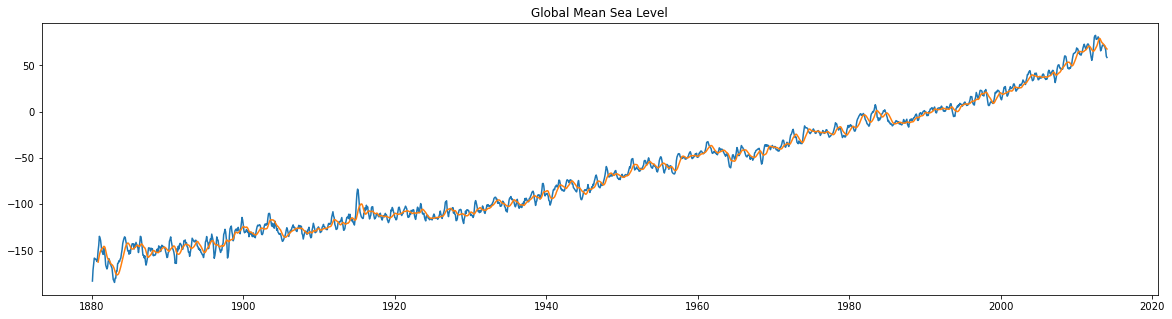

In [12]:
# plot sea level with rolling average:

plt.figure(figsize=(20,5))
plt.plot(sea_level['GMSL'])
plt.plot(sea_level['GMSL'].rolling(10).mean())
plt.title('Global Mean Sea Level')

In [13]:
sea_level[sea_level['GMSL'] == 0]

,GMSL,GMSL uncertainty
Time,,
1990-06-30,0.0,6.5


In [14]:
# Locating the baseline GMSL == 0:
sea_level.loc['1990']

,GMSL,GMSL uncertainty
Time,,
1990-01-31,-0.2,6.5
1990-02-28,-2.6,6.5
1990-03-31,-4.4,6.5
1990-04-30,-3.9,6.5
1990-05-31,-4.1,6.5
1990-06-30,0.0,6.5
1990-07-31,-0.2,6.5
1990-08-31,2.8,6.5
1990-09-30,3.0,6.5


<Figure size 1440x1440 with 0 Axes>

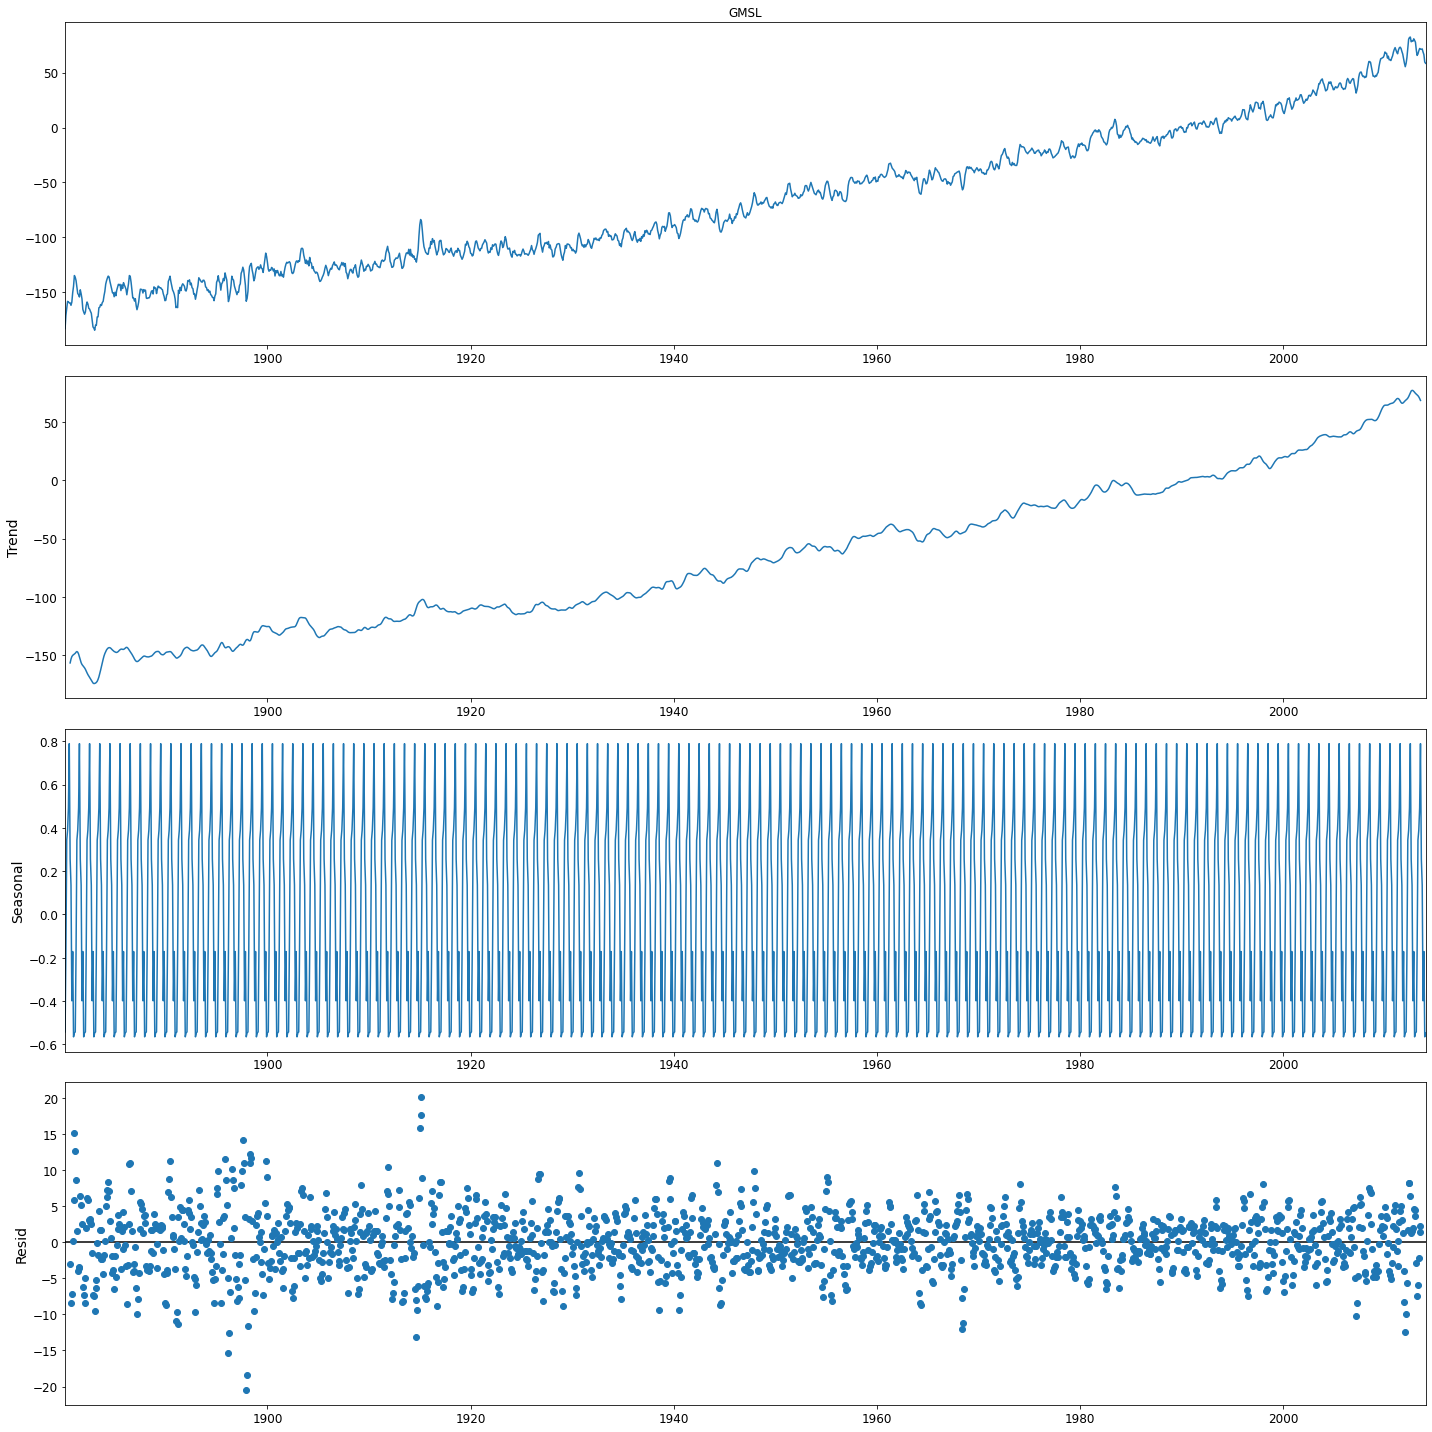

In [15]:
# Additive model
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (20,20)
res = sm.tsa.seasonal_decompose(sea_level['GMSL'],period=12,model="additive")
plt.figure(figsize=(20,20))
fig = res.plot()
fig.show()

# ACF and PACF


In [16]:
from statsmodels.tsa.stattools import adfuller
X = sea_level['GMSL']
result = adfuller(X)

In [17]:
# Sin diff:
print('ADF Statistic: %f' % result[0]) # Resultado NO es estacionario, aceptamos la hipotesis nula (H0)
print('p-value: %f' % result[1])

ADF Statistic: 1.004781
p-value: 0.994316


In [18]:
# Con diff, comprobar si es estacionario (p<= 0.05)
X = sea_level.diff()['GMSL'][1:]
result = adfuller(X)

In [19]:
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])

ADF Statistic: -11.090130
p-value: 0.000000


<AxesSubplot:xlabel='Time'>

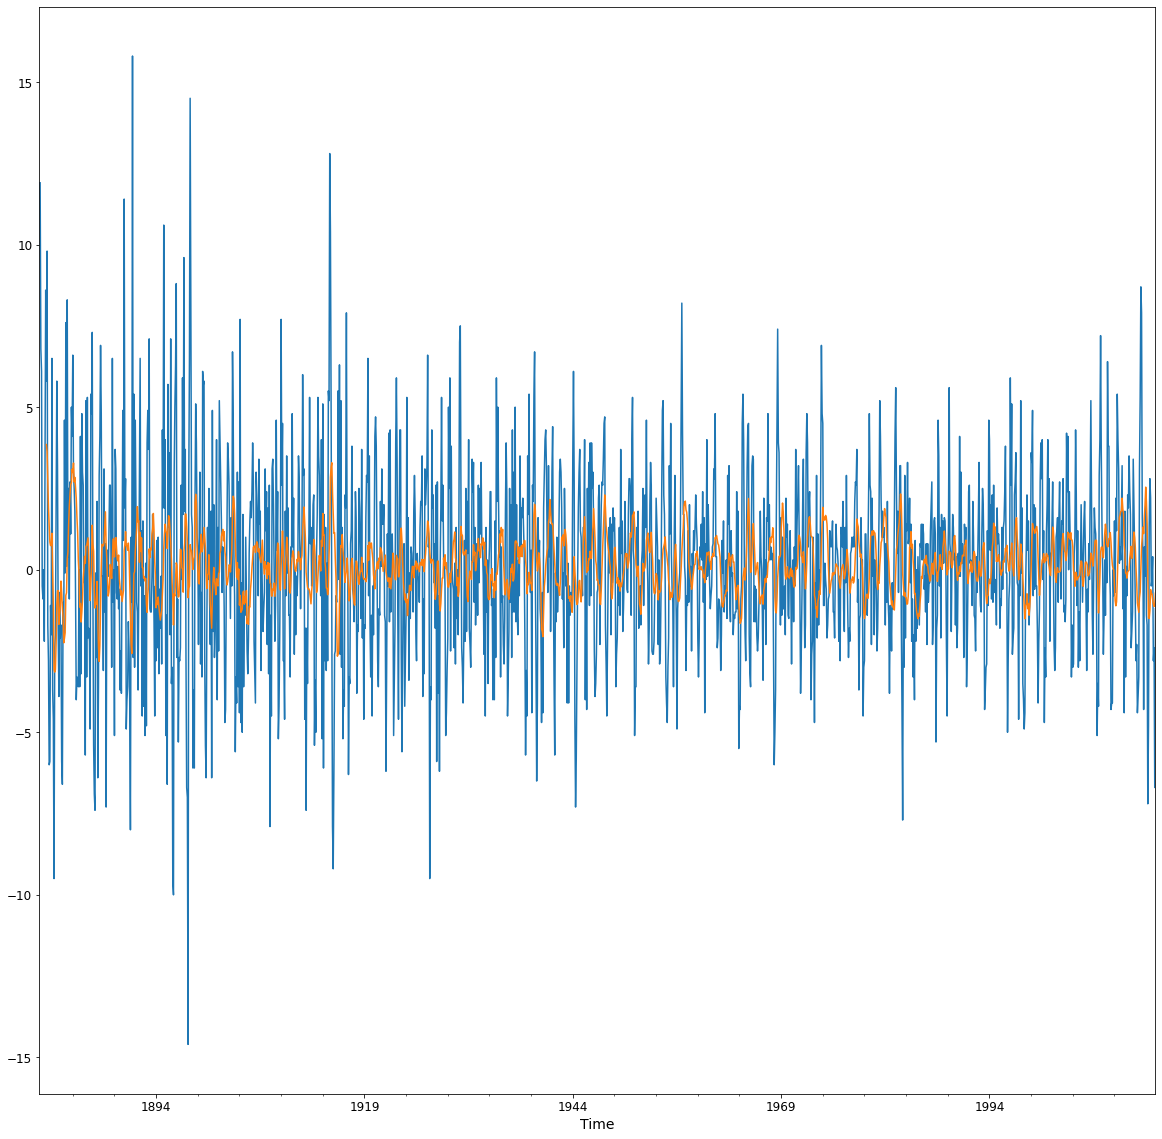

In [20]:
sea_level['GMSL'].diff().plot()
sea_level['GMSL'].diff().rolling(10).mean().plot()

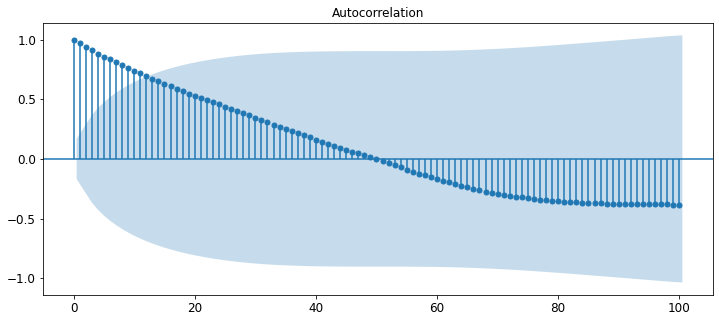

In [21]:
# ACF no diff
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(sea_level['GMSL'].resample('Y').mean(), lags=100, ax=ax)
plt.show()

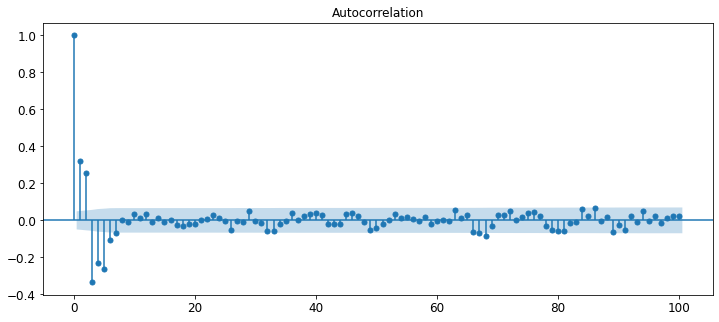

In [22]:
# ACF diff()
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(sea_level['GMSL'].diff().dropna(), lags=100, ax=ax)
plt.show()

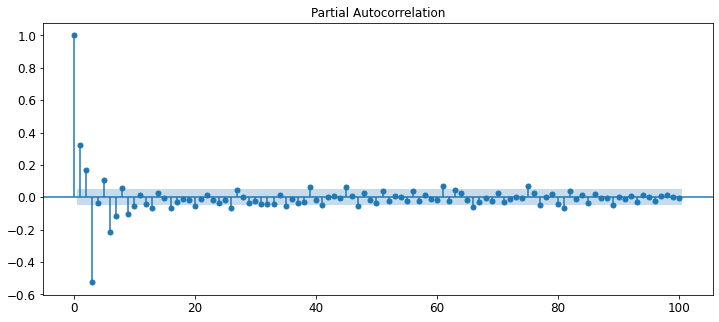

In [23]:
# PACF diff()

fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(sea_level['GMSL'].diff().dropna(), lags=100, ax=ax)
plt.show()

In [24]:
# ARIMA model:

from statsmodels.tsa.api import SARIMAX

model = SARIMAX(sea_level['GMSL'], order=(1,1,3))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   GMSL   No. Observations:                 1608
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -3631.853
Date:                Tue, 26 Oct 2021   AIC                           7273.706
Time:                        19:45:41   BIC                           7300.617
Sample:                    01-31-1880   HQIC                          7283.697
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6808      0.027     25.240      0.000       0.628       0.734
ma.L1         -0.3378      0.023    -14.872      0.000      -0.382      -0.293
ma.L2          0.2118      0.018     11.880      0.0

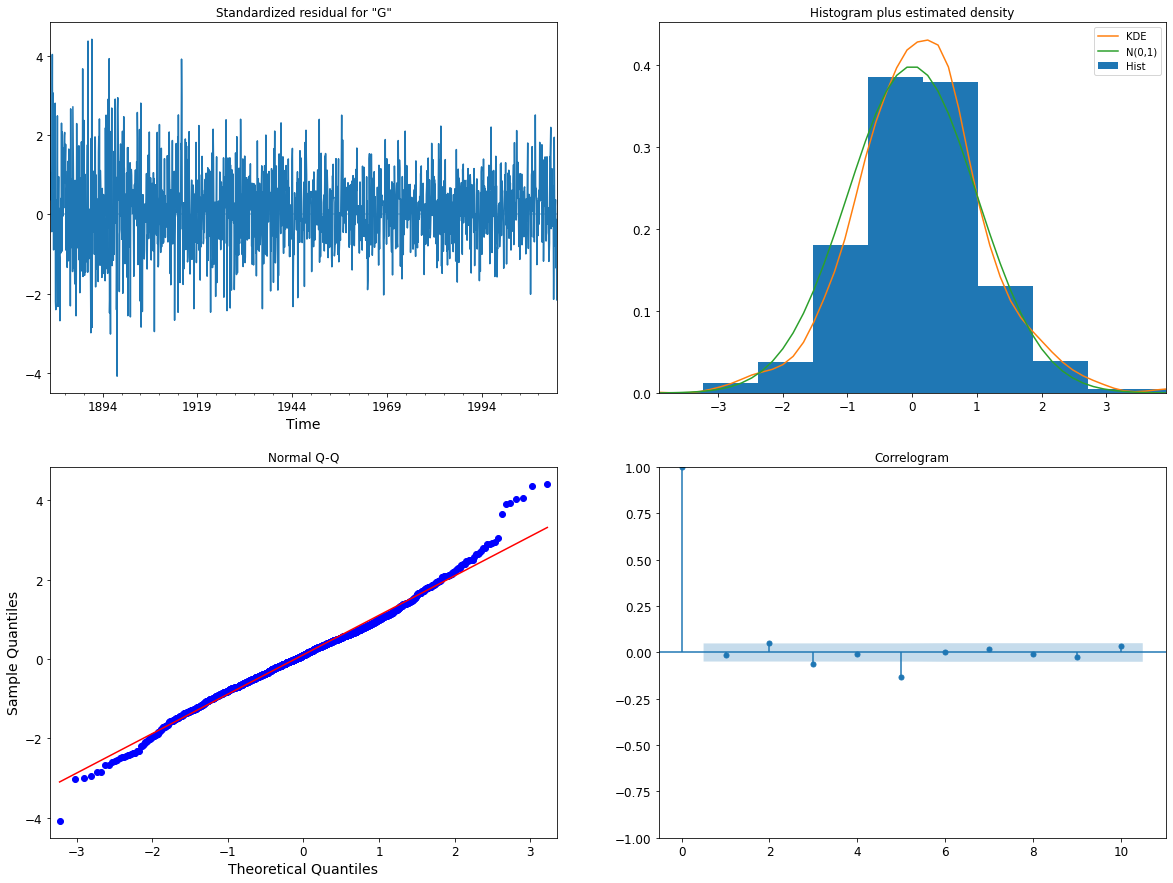

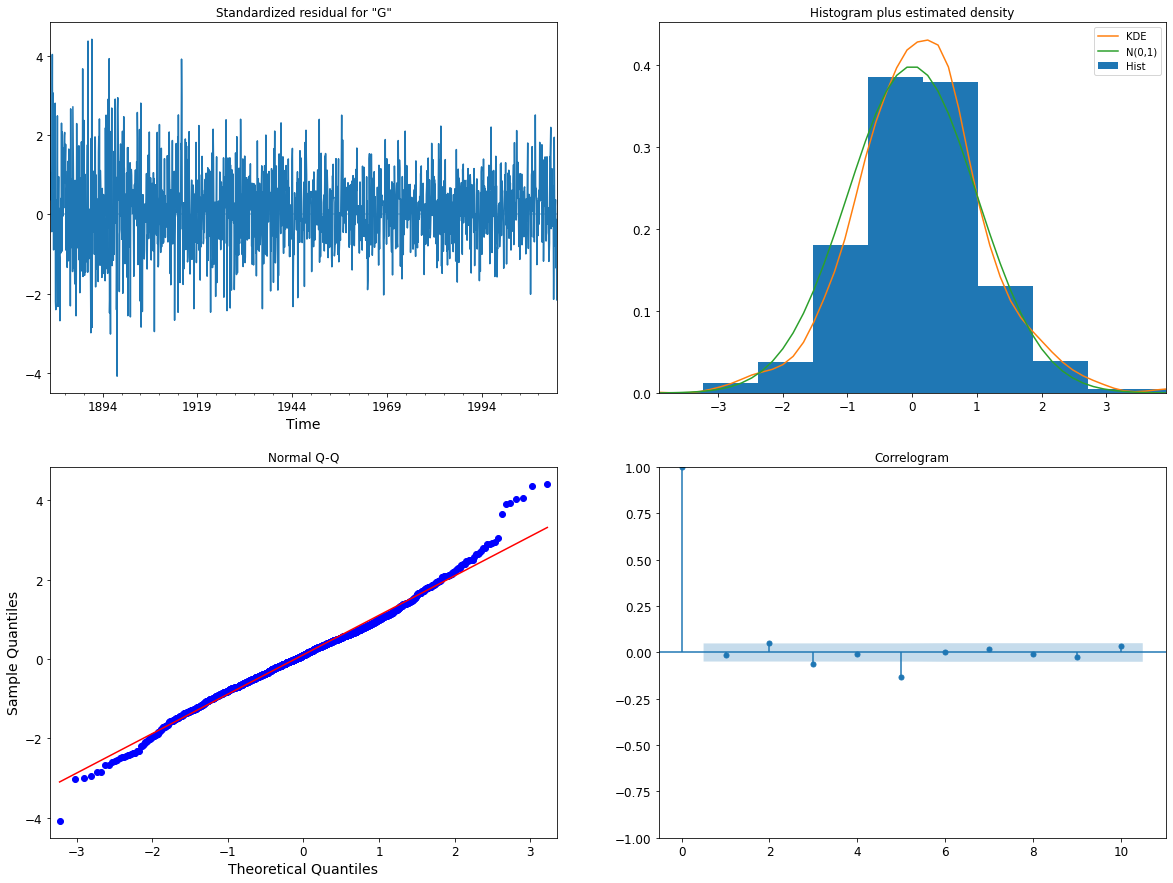

In [25]:
model_fit.plot_diagnostics(figsize=(20,15))

In [26]:
type(model_fit)

statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper

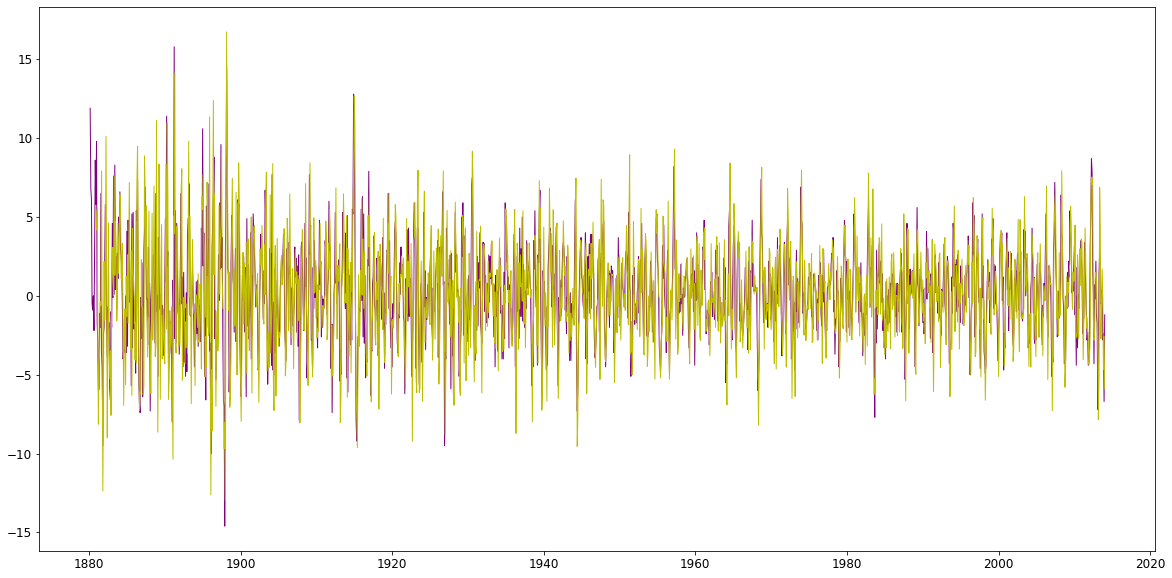

In [27]:
# Actual vs Fitted
fitted_results = model_fit.get_prediction(start=sea_level.index[10])

#fitted_model.plot_predict(dynamic=False)
plt.show()

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
ax.plot(sea_level["GMSL"].diff(1).dropna(), linewidth=1.0, color = 'purple')
ax.plot(fitted_results.predicted_mean.diff(1).dropna(), linewidth=1.0, color = 'y')

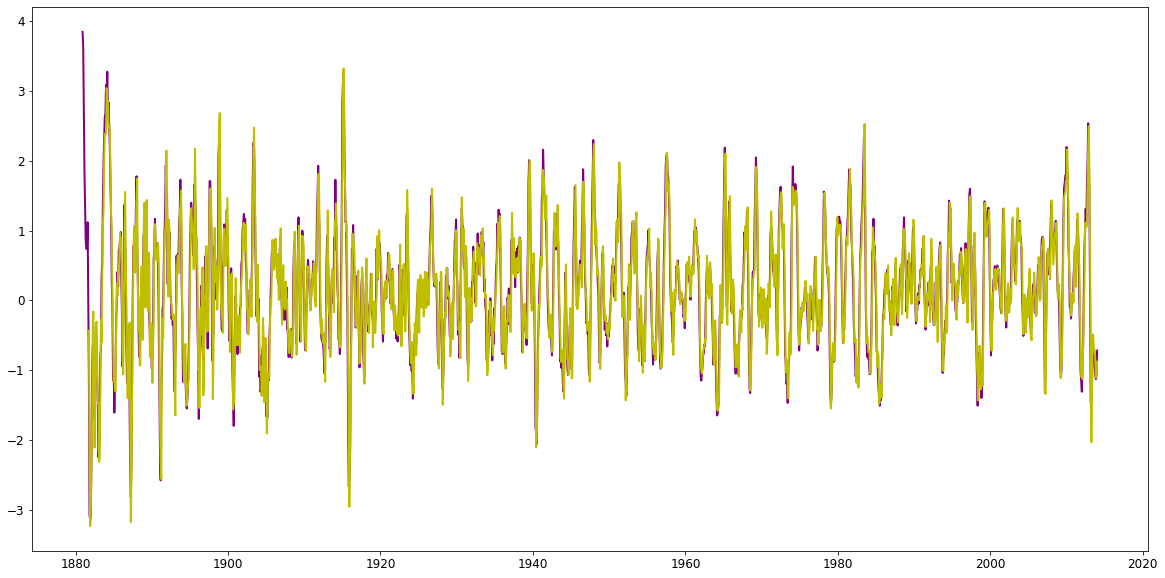

In [28]:
# con rolling mean:
# Actual vs Fitted
fitted_results = model_fit.get_prediction(start=sea_level.index[10])

#fitted_model.plot_predict(dynamic=False)
plt.show()

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
ax.plot(sea_level["GMSL"].diff(1).rolling(10).mean().dropna(), linewidth=2.0, color = 'purple')
ax.plot(fitted_results.predicted_mean.diff(1).rolling(10).mean().dropna(), linewidth=2.0, color = 'y')

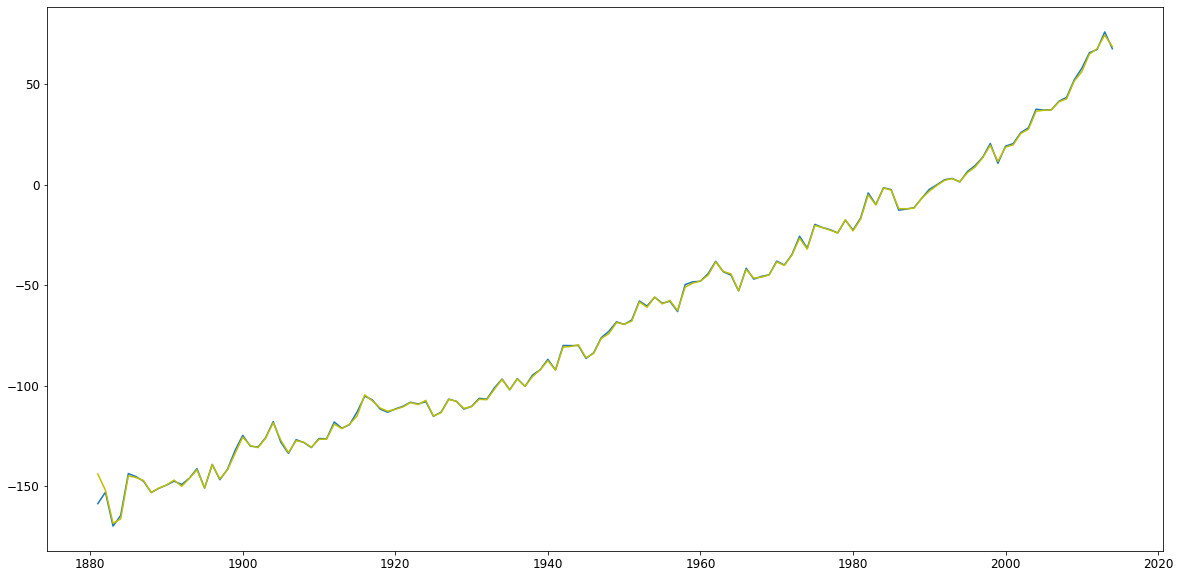

In [29]:
fig, ax = plt.subplots()
ax.plot(sea_level['GMSL'].resample('Y').mean())
ax.plot(fitted_results.predicted_mean.resample('Y').mean(), color ='y')

# SARIMA model

In [30]:
import statsmodels.tsa.api as tsa # tsa means time-series analysis

model = tsa.SARIMAX(endog= sea_level["GMSL"], order = (3,1,3), 
                    seasonal_order = (0,1,1,12))

In [31]:
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 GMSL   No. Observations:                 1608
Model:             SARIMAX(3, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -3592.582
Date:                              Tue, 26 Oct 2021   AIC                           7201.164
Time:                                      19:46:12   BIC                           7244.161
Sample:                                  01-31-1880   HQIC                          7217.132
                                       - 12-31-2013                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6665      0.029     23.215      0.000       0.610       0.723
ar.L2          0.1734      0.036      4.823      0.000       0.103       0.244
ar.L3         -0.2052      0.031     -6.552      0.000      -0.267      -0.144
ma.L1         -0.3322      0.025    -13.097      0.000      -0.382      -0.282
ma.L2          0.0920      0.028      3.291      0.001       0.037       0.147
ma.L3         -0.6150      0.025    -24.256      0.000      -0.665      -0.565
ma.S.L12      -0.9610      0.010    -92.608      0.000      -0.981      -0.941
sigma2         5.1836      0.157     33.035      0.000       4.876       5.491
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                46.85
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

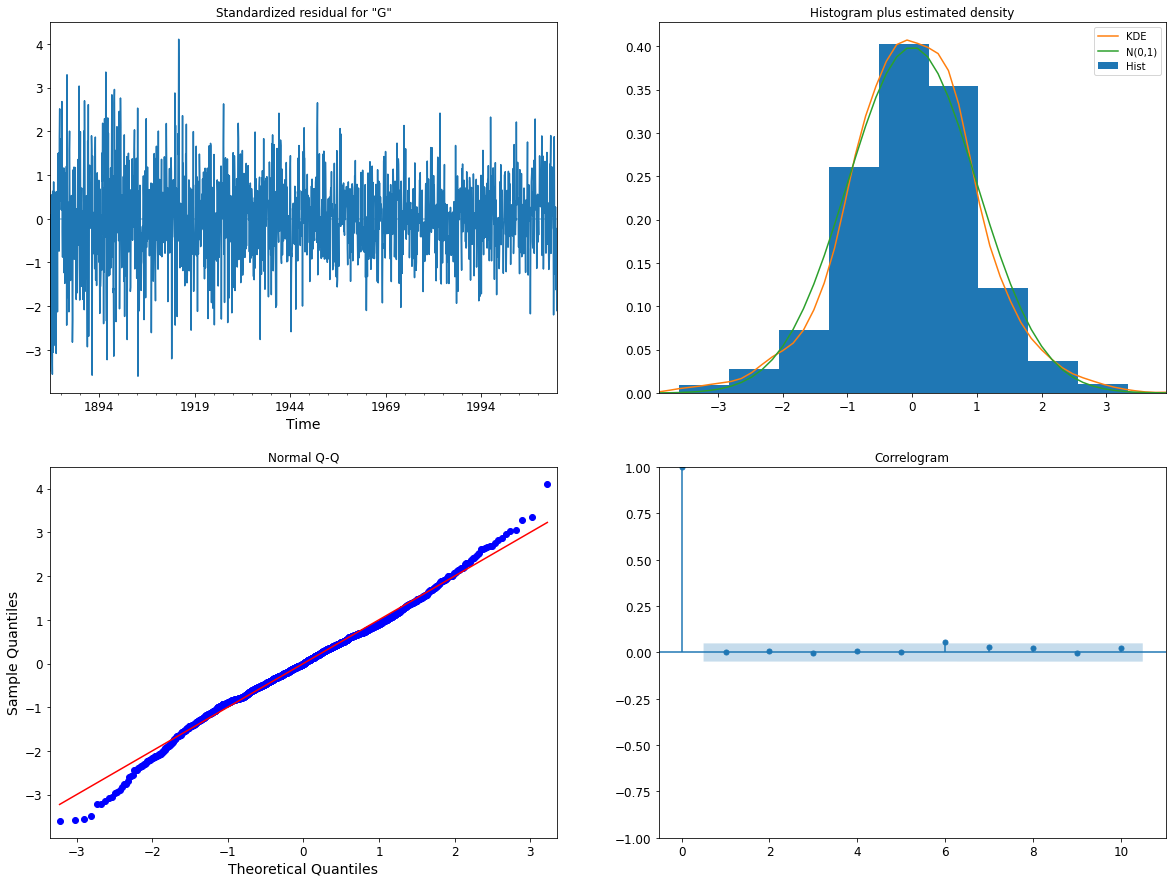

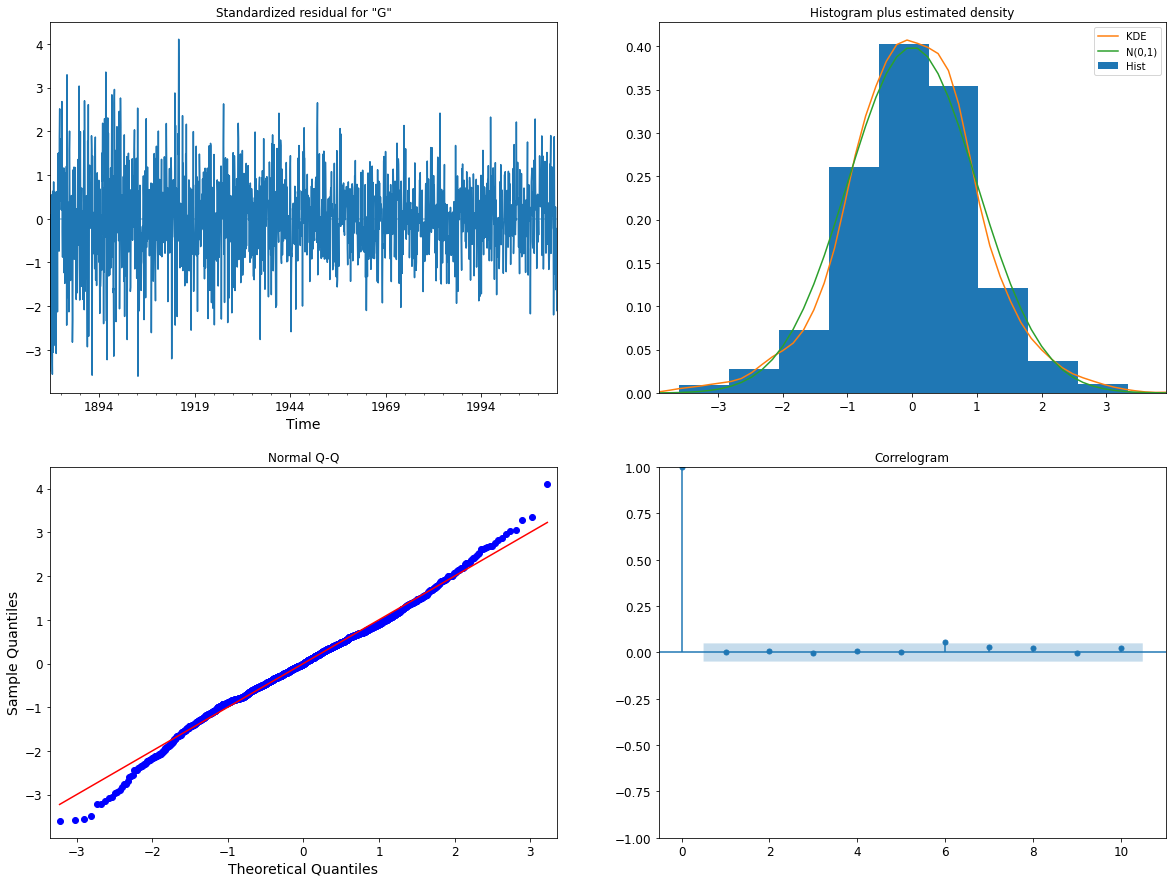

In [32]:
# Plot diagnostics
fitted_model.plot_diagnostics(figsize=(20,15))

# Comparison Fitted vs Actual sea level

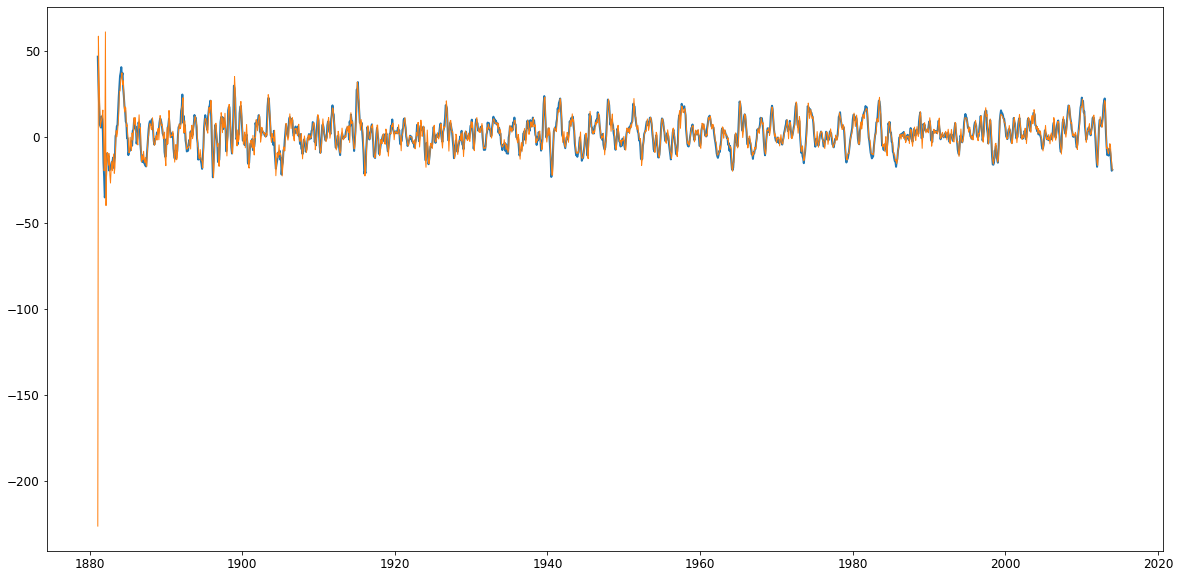

In [33]:
# Actual vs Fitted
fitted_results = fitted_model.get_prediction(start=sea_level.index[0])

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
ax.plot(sea_level["GMSL"].diff(12), linewidth = 2.0)
ax.plot(fitted_results.predicted_mean.diff(12), linewidth = 1.0)
    
    
# actual and fitted values without seasonal component  

Text(0.5, 1.0, 'SARIMA - Global Mean Sea Level')

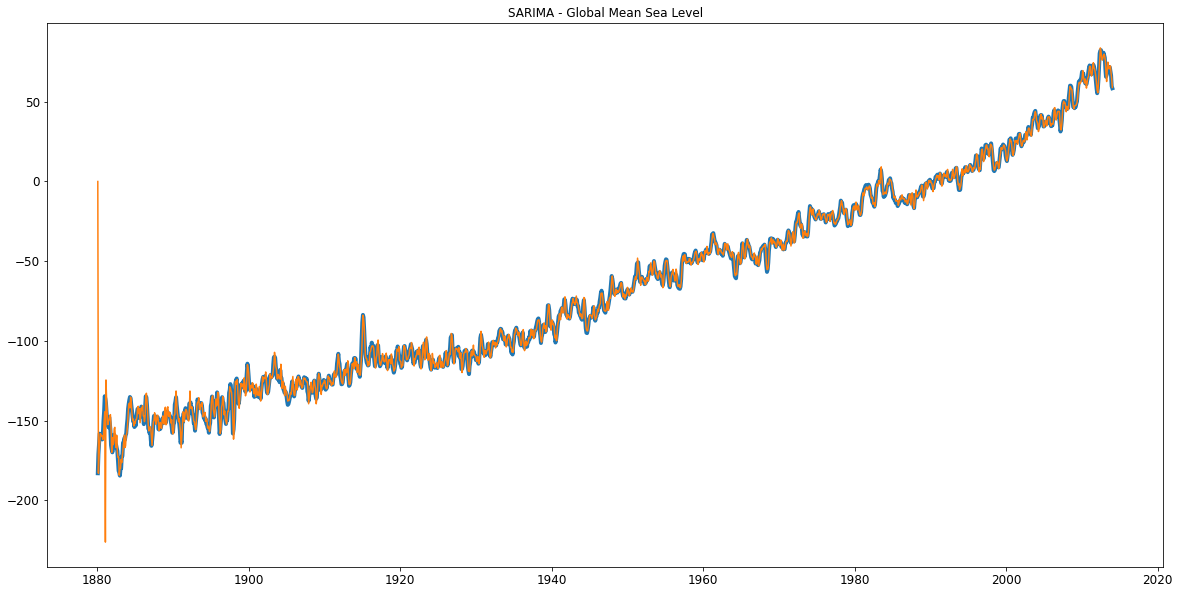

In [34]:
# Plot the actual sea_level vs predicted sea_level resampled by month

fig, ax = plt.subplots()
ax.plot(sea_level["GMSL"], linewidth=4)
ax.plot(fitted_results.predicted_mean, linewidth =1.5)
plt.title('SARIMA - Global Mean Sea Level')  

# We can see that the model follows a similar trend to the actual sea level

## Validating the model

### out-of-time cross validation

In [ ]:
# Train/test split(75/25)

In [35]:
year_train = '2000'

In [36]:
# Create the variables train and test:

train = sea_level[:year_train]
test = sea_level[year_train:]

In [37]:
train.head()

,GMSL,GMSL uncertainty
Time,,
1880-01-31,-183.0,24.2
1880-02-29,-171.1,24.2
1880-03-31,-164.3,24.2
1880-04-30,-158.2,24.2
1880-05-31,-158.7,24.2


In [38]:
test.head()

,GMSL,GMSL uncertainty
Time,,
2000-01-31,12.8,6.8
2000-02-29,15.5,6.8
2000-03-31,19.4,6.8
2000-04-30,22.2,6.8
2000-05-31,26.2,6.8


In [615]:
type(model)

statsmodels.tsa.statespace.sarimax.SARIMAX

In [39]:
#### FITTING THE MODEL #####
# Create the SARIMA model of train

model = tsa.SARIMAX(endog= train["GMSL"], order = (3,1,3), 
                    seasonal_order = (0,1,1,12))

fitted_model2 = model.fit()
fitted_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 GMSL   No. Observations:                 1452
Model:             SARIMAX(3, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -3263.026
Date:                              Tue, 26 Oct 2021   AIC                           6542.051
Time:                                      19:46:46   BIC                           6584.225
Sample:                                  01-31-1880   HQIC                          6557.795
                                       - 12-31-2000                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6698      0.030     22.422      0.000       0.611       0.728
ar.L2          0.1772      0.038      4.673      0.000       0.103       0.252
ar.L3         -0.1970      0.033     -5.996      0.000      -0.261      -0.133
ma.L1         -0.3533      0.026    -13.505      0.000      -0.405      -0.302
ma.L2          0.0932      0.029      3.166      0.002       0.036       0.151
ma.L3         -0.6237      0.026    -23.988      0.000      -0.675      -0.573
ma.S.L12      -0.9648      0.011    -89.146      0.000      -0.986      -0.944
sigma2         5.3249      0.169     31.425      0.000       4.993       5.657
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                43.74
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

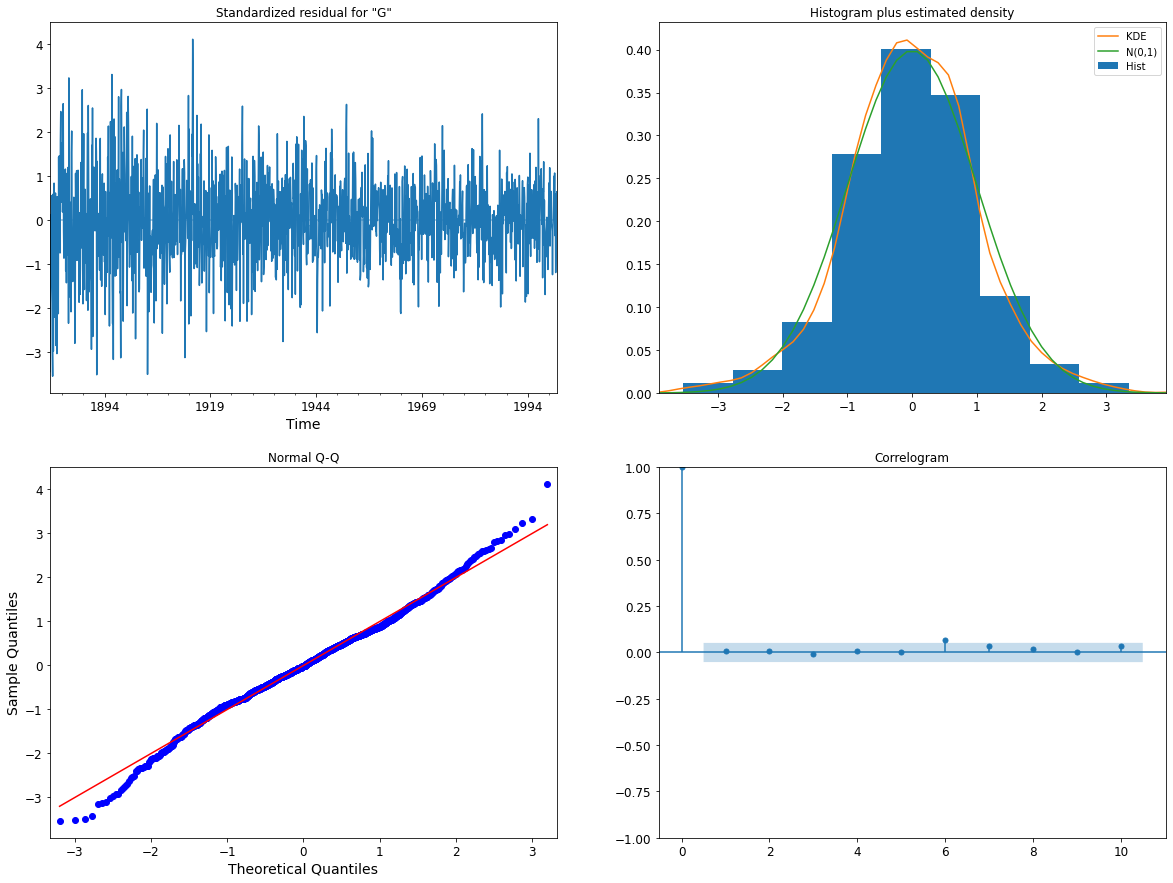

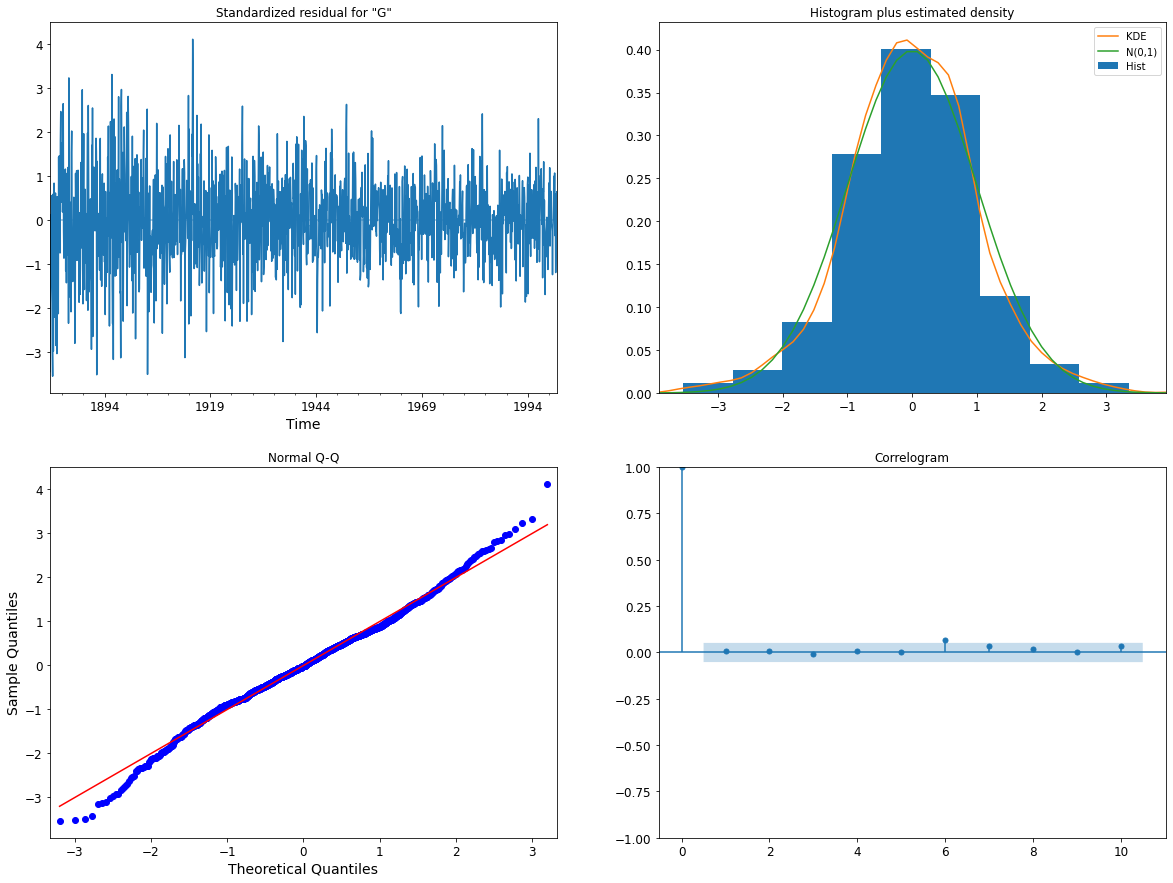

In [40]:
# Plot diagnostics: 

fitted_model2.plot_diagnostics(figsize=(20,15))

In [41]:
##### FORECASTING TEST
# test Forecast
n_periods = len(test)


predicted_values = fitted_model2.get_prediction(start=train.index[-12], end=test.index[-1], alpha=0.05)
index_of_fc = pd.date_range(end=test.index[-1], periods = n_periods, freq='M')



In [42]:
n_periods

168

In [43]:
type(predicted_values)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [44]:
fitted_series

NameError: name 'fitted_series' is not defined

In [45]:
# make series for plotting purpose
fitted_series = pd.Series(predicted_values.predicted_mean, index=index_of_fc)
lower_series = pd.Series(predicted_values.conf_int()["lower GMSL"], index=index_of_fc)
upper_series = pd.Series(predicted_values.conf_int()["upper GMSL"], index=index_of_fc)

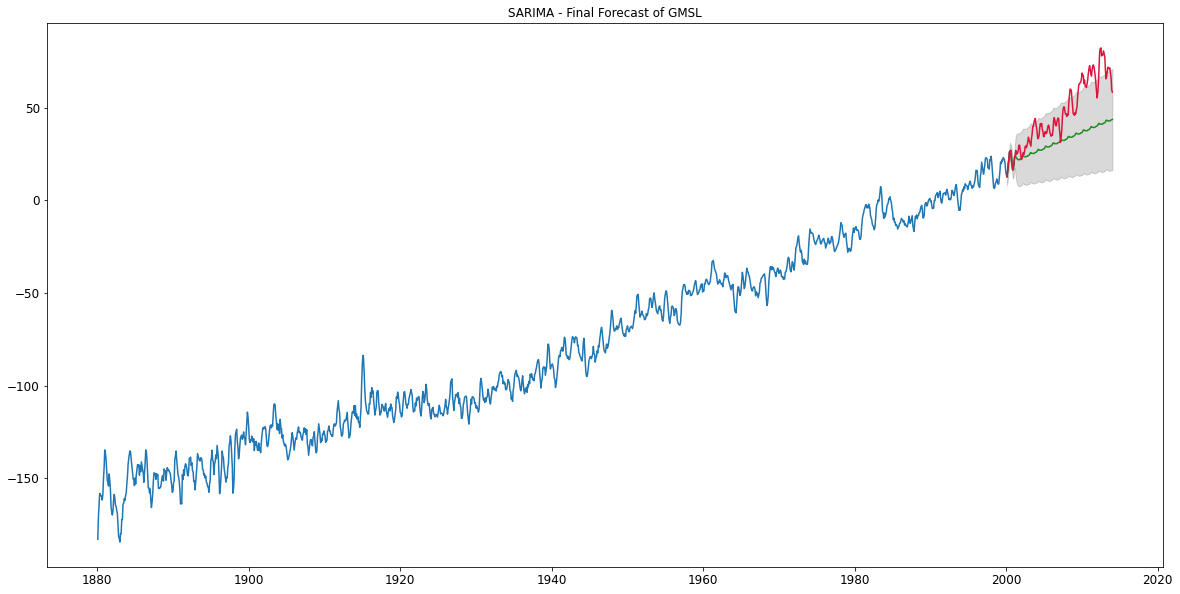

In [46]:
# Plot test results

plt.plot(train["GMSL"])
plt.plot(fitted_series, color='forestgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.plot(test["GMSL"], color='crimson')
plt.title("SARIMA - Final Forecast of GMSL")
plt.show()

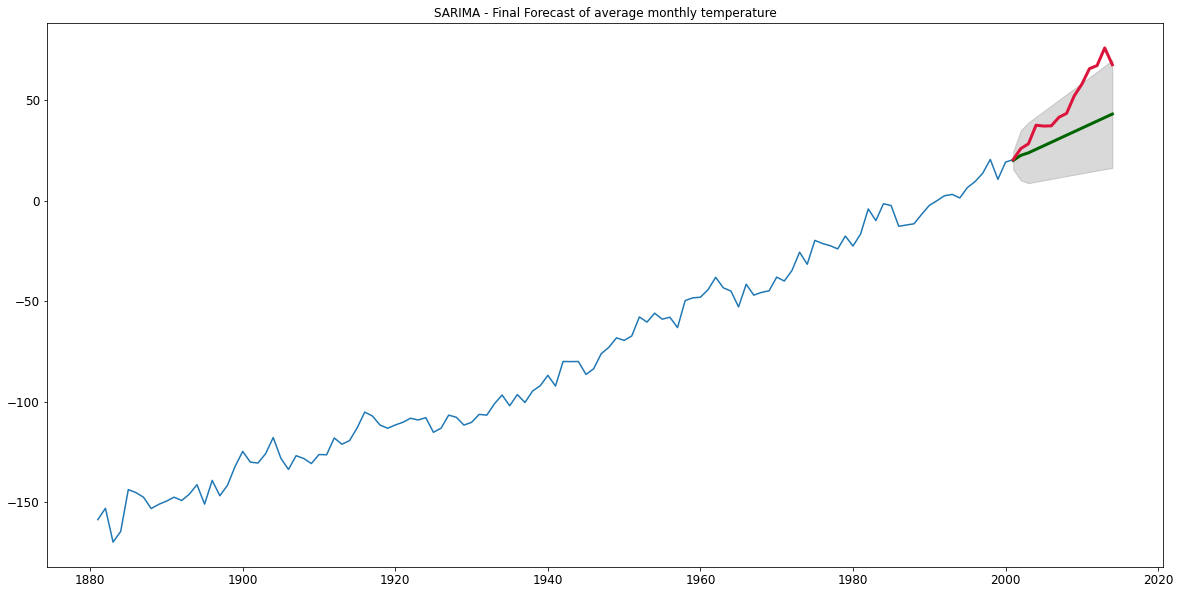

In [47]:
# Plot train dataset with test and prediction

plt.plot(train["GMSL"].resample('Y').mean())
plt.plot(fitted_series.resample('Y').mean(), linewidth = 3.0, color='darkgreen')
plt.fill_between(lower_series.resample('Y').mean().index, 
                 lower_series.resample('Y').mean(), 
                 upper_series.resample('Y').mean(), 
                 color='k', alpha=.15)

plt.plot(test["GMSL"].resample('Y').mean(), linewidth = 3.0, color='crimson')
plt.title("SARIMA - Final Forecast of average monthly temperature")
plt.show()

In [48]:
### Validation measurements

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE (Mean absolute percentage of error)
    me = np.mean(forecast - actual)             # ME (Margin of error)
    mae = np.mean(np.abs(forecast - actual))    # MAE (Mean Absolute Error)
    mpe = np.mean((forecast - actual)/actual)   # MPE (mean percentage Error)
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE (Root of Mean Squared Error)
    corr = np.corrcoef(forecast, actual)[0,1]   # corr (Correlation)
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]              # ACF (Autocorrelation function)
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [49]:
# Print forecast measurements:

forecast_accuracy(fitted_series, test["GMSL"])

{'mape': 0.2818563137398438,
 'me': -15.297499003443992,
 'mae': 15.382211190530247,
 'mpe': -0.27818308074242076,
 'rmse': 18.9301822561928,
 'acf1': 0.9640614701343545,
 'corr': 0.9357068341087181,
 'minmax': 0.2817311047116803}

In [50]:
test['GMSL']

Time
2000-01-31    12.8
2000-02-29    15.5
2000-03-31    19.4
2000-04-30    22.2
2000-05-31    26.2
              ... 
2013-08-31    71.6
2013-09-30    68.8
2013-10-31    66.4
2013-11-30    59.7
2013-12-31    58.5
Freq: M, Name: GMSL, Length: 168, dtype: float64

In [651]:
fitted_series

2000-01-31    12.837956
2000-02-29    14.447654
2000-03-31    17.093766
2000-04-30    21.496403
2000-05-31    23.726913
                ...    
2013-08-31    42.941981
2013-09-30    43.143854
2013-10-31    43.514952
2013-11-30    43.556925
2013-12-31    43.774765
Freq: M, Name: predicted_mean, Length: 168, dtype: float64

# forecast until 2025

In [51]:
sea_level.index[-12]

Timestamp('2013-01-31 00:00:00', freq='M')

In [52]:
predicted_values = fitted_model2.get_prediction(start=train.index[-12], end=test.index[-1], alpha=0.05)

In [53]:
# make series for plotting purpose
fitted_series = pd.Series(predicted_values.predicted_mean, index=index_of_fc)
lower_series = pd.Series(predicted_values.predicted_mean - predicted_values.var_pred_mean, index=index_of_fc)
upper_series = pd.Series(predicted_values.predicted_mean + predicted_values.var_pred_mean, index=index_of_fc)

In [54]:
fitted_results.predicted_mean.index

DatetimeIndex(['1880-01-31', '1880-02-29', '1880-03-31', '1880-04-30',
               '1880-05-31', '1880-06-30', '1880-07-31', '1880-08-31',
               '1880-09-30', '1880-10-31',
               ...
               '2013-03-31', '2013-04-30', '2013-05-31', '2013-06-30',
               '2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31',
               '2013-11-30', '2013-12-31'],
              dtype='datetime64[ns]', name='Time', length=1608, freq='M')

In [55]:
lower_series

2000-01-31      7.513025
2000-02-29      9.122724
2000-03-31     11.768837
2000-04-30     16.171474
2000-05-31     18.401984
                 ...    
2013-08-31   -146.376425
2013-09-30   -147.360630
2013-10-31   -148.170820
2013-11-30   -149.310006
2013-12-31   -150.274493
Freq: M, Length: 168, dtype: float64

In [639]:
type(fitted_results.conf_int())

pandas.core.frame.DataFrame

In [640]:
type(fitted_results)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [56]:
fitted_results.conf_int()['lower GMSL']

Time
1880-01-31   -2771.820011
1880-02-29   -2142.982010
1880-03-31   -2131.081828
1880-04-30   -2124.280869
1880-05-31   -2118.181118
                 ...     
2013-08-31      67.682753
2013-09-30      68.043219
2013-10-31      63.543634
2013-11-30      60.031377
2013-12-31      54.552728
Freq: M, Name: lower GMSL, Length: 1608, dtype: float64

In [57]:
lower_series

2000-01-31      7.513025
2000-02-29      9.122724
2000-03-31     11.768837
2000-04-30     16.171474
2000-05-31     18.401984
                 ...    
2013-08-31   -146.376425
2013-09-30   -147.360630
2013-10-31   -148.170820
2013-11-30   -149.310006
2013-12-31   -150.274493
Freq: M, Length: 168, dtype: float64

Text(0, 0.5, 'Global mean sea level (mm)')

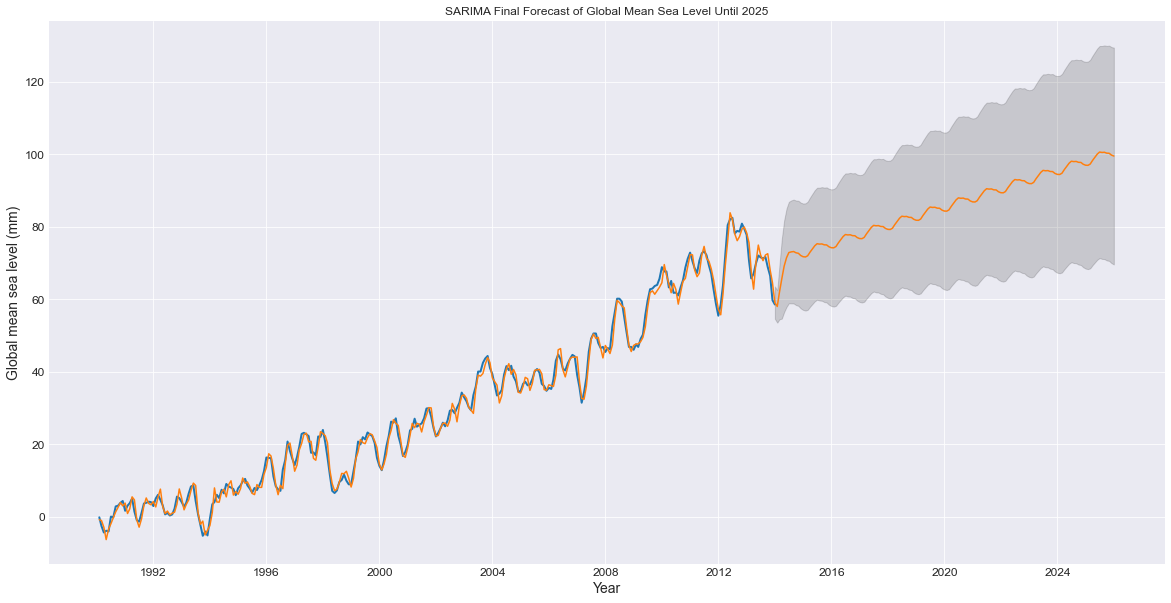

In [68]:
fitted_results = fitted_model.get_prediction(start=sea_level.index[0], end="2025-12-31", dynamic=False, alpha=0.05)

lower_series = pd.Series(fitted_results.conf_int()["lower GMSL"], index=fitted_results.predicted_mean.index)
upper_series = pd.Series(fitted_results.conf_int()["upper GMSL"], index=fitted_results.predicted_mean.index)

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
ax.plot(sea_level["GMSL"]['1990':], linewidth=2.0)
ax.plot(fitted_results.predicted_mean['1990':], linewidth=1.5)
plt.fill_between(lower_series['2013-12-31':].index, 
                 lower_series['2013-12-31':], 
                 upper_series['2013-12-31':], 
                 color='k', alpha=.15)
plt.title('SARIMA Final Forecast of Global Mean Sea Level Until 2025')
plt.xlabel('Year')
plt.ylabel('Global mean sea level (mm)')

Text(0.5, 1.0, 'SARIMA Final Forecast of Global Mean Sea Level Until 2030')

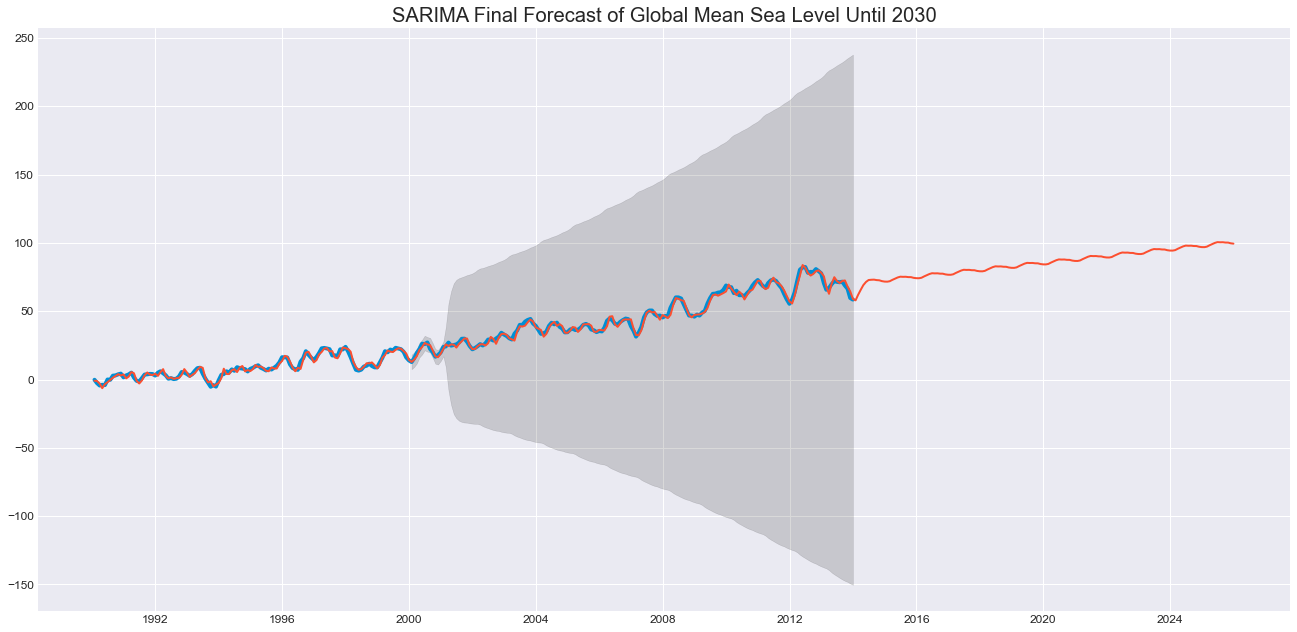

In [612]:
fitted_results = fitted_model.get_prediction(start=sea_level.index[0], end="2025-12-31", dynamic=False)

plt.rcParams["figure.figsize"] = (20,10)

fig, ax = plt.subplots()
ax.plot(sea_level["GMSL"]['1990':])
ax.plot(fitted_results.predicted_mean['1990':], linewidth=2.0)
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.title('SARIMA Final Forecast of Global Mean Sea Level Until 2030')   

In [614]:
type(fitted_model2)

statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper